### Logistic Regression and Classification
* Logistic regression is trained on an output variable that is discrete (a binary 1 or 0) or a categorical number (which is a whole number). 
* It does output a continuous variable (from 0 to 1) in the form of probability, but that can be converted into a discrete value with a threshold.
* it's an S-shaped curve (a sigmoid curve).

1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


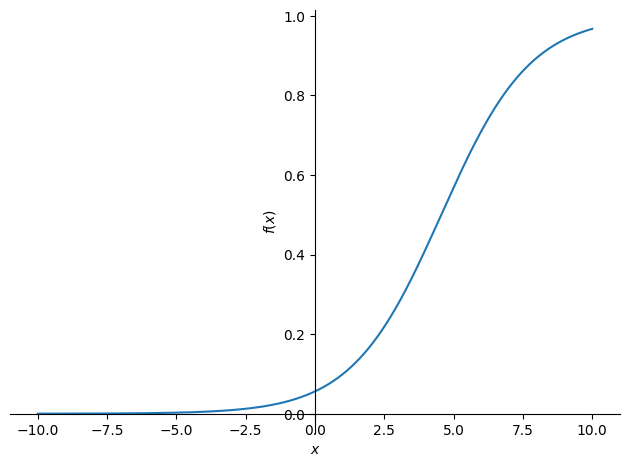

In [2]:
from sympy import *

b0, b1, x = symbols('b0 b1 x')
p=1.0/(1.0+exp(-(b0+b1*x)))

p = p.subs(b0,-2.823) 
p = p.subs(b1, 0.620) 
print(p)

plot(p)

Fitting the Logistic Curve
* use maximum likelihood estimation (MLE), which, as the name suggests, maximizes the likelihood a given logistic curve would output the observed data.

In [46]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the data
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Perform logistic regression
# Turn off penalty
model = LogisticRegression(penalty=None)
model.fit(X, Y) 

# print beta1
print(model.coef_.flatten()) # 0.69267212 
# print beta0
print(model.intercept_.flatten()) # -3.17576395

[0.69268939]
[-3.17580504]


In [30]:
# Predict the class (0 or 1), Predict the probability (of class 0 and 1)
model.predict([[5.3]]), model.predict_proba([[5.3]])

(array([1.]), array([[0.37861083, 0.62138917]]))

### Using Maximum Likelihood and Gradient Descent
* Applying the idea of joint probabilities (multiplying them together).

In [77]:
# Calculating the joint likelihood of observing all the points for a given logistic regression
import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

# Calculate the joint likelihood
joint_likelihood = 1.0

for p in patient_data: 
    # if p.y == 1.0:
    #     joint_likelihood *= logistic_function(p.x) 
    # elif p.y == 0.0:
    #     joint_likelihood *= (1.0 - logistic_function(p.x))
    
    # a shorter way:
    joint_likelihood *= logistic_function(p.x) ** p.y * \
                        (1.0 - logistic_function(p.x)) ** (1.0 - p.y)
    
    print(f'x: {p.x},\t y: {p.y},\t logistic function: {logistic_function(p.x):4f},\
        \t 1 - logit: {1 - logistic_function(p.x):4f}')

print(f'Joint likelihood: {joint_likelihood:5f}')

x: 1.0,	 y: 0,	 logistic function: 0.077052,        	 1 - logit: 0.922948
x: 1.5,	 y: 0,	 logistic function: 0.105575,        	 1 - logit: 0.894425
x: 2.1,	 y: 0,	 logistic function: 0.151723,        	 1 - logit: 0.848277
x: 2.4,	 y: 0,	 logistic function: 0.180443,        	 1 - logit: 0.819557
x: 2.5,	 y: 1,	 logistic function: 0.190914,        	 1 - logit: 0.809086
x: 3.1,	 y: 0,	 logistic function: 0.263379,        	 1 - logit: 0.736621
x: 4.2,	 y: 0,	 logistic function: 0.433756,        	 1 - logit: 0.566244
x: 4.4,	 y: 1,	 logistic function: 0.468042,        	 1 - logit: 0.531958
x: 4.6,	 y: 1,	 logistic function: 0.502632,        	 1 - logit: 0.497368
x: 4.9,	 y: 0,	 logistic function: 0.554367,        	 1 - logit: 0.445633
x: 5.2,	 y: 1,	 logistic function: 0.604949,        	 1 - logit: 0.395051
x: 5.6,	 y: 0,	 logistic function: 0.668897,        	 1 - logit: 0.331103
x: 6.1,	 y: 1,	 logistic function: 0.740686,        	 1 - logit: 0.259314
x: 6.4,	 y: 1,	 logistic function: 0.7

In [38]:
# use logarithmic addition instead of multiplication to fight floating point underflow
joint_likelihood = 0.0

for p in patient_data:
    joint_likelihood += math.log(logistic_function(p.x) ** p.y * \
                                 (1.0 - logistic_function(p.x)) ** (1.0 - p.y))

joint_likelihood = math.exp(joint_likelihood)
print(joint_likelihood)

1.0


In [39]:
# Using gradient descent on logistic regression
from sympy import * 
import pandas as pd

points = list(pd.read_csv("https://tinyurl.com/y2cocoo7").itertuples())

b1, b0, i, n = symbols('b1 b0 i n')
x, y = symbols('x y', cls=Function)
joint_likelihood = Sum(log((1.0 / (1.0 + exp(-(b0 + b1 * x(i))))) ** y(i) \
        * (1.0 - (1.0 / (1.0 + exp(-(b0 + b1 * x(i)))))) ** (1 - y(i))), (i, 0, n))

# Partial derivative for m, with points substituted
d_b1 = diff(joint_likelihood, b1) \
                .subs(n, len(points) - 1).doit() \
                .replace(x, lambda i: points[i].x) \
                .replace(y, lambda i: points[i].y)

# Partial derivative for m, with points substituted
d_b0 = diff(joint_likelihood, b0) \
                .subs(n, len(points) - 1).doit() \
                .replace(x, lambda i: points[i].x) \
                .replace(y, lambda i: points[i].y)

# compile using lambdify for faster computation
d_b1 = lambdify([b1, b0], d_b1)
d_b0 = lambdify([b1, b0], d_b0)

# Perform Gradient Descent
b1 = 0.01 
b0 = 0.01 
L = .01

for j in range(10_000):
    b1 += d_b1(b1, b0) * L 
    b0 += d_b0(b1, b0) * L

print(b1, b0)

0.6926693075370818 -3.175751550409824


### Multivariable Logistic Regression - exploring possibly discriminatory input variables

In [65]:
# Doing a multivariable logistic regression on employee data
import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv("https://tinyurl.com/y6r7qjrp") 

# grab independent variable columns
inputs = employee_data.iloc[:, :-1]
# grab dependent "did_quit" variable column
output = employee_data.iloc[:, -1] 

# build logistic regression
fit = LogisticRegression(penalty=None).fit(inputs, output)

# Print coefficients:
print("COEFFICIENTS: {0}".format(fit.coef_.flatten())) 
print("INTERCEPT: {0}".format(fit.intercept_.flatten()))

# Interact and test with new employee data
def predict_employee_will_stay(sex, age, promotions, years_employed):
    pred_df = pd.DataFrame([[sex, age, promotions, years_employed]], 
                           columns=['SEX', 'AGE', 'PROMOTIONS', 'YEARS_EMPLOYED']) 
    prediction = fit.predict(pred_df) 
    probabilities = fit.predict_proba(pred_df) 
    if prediction == [[1]]:
        return "WILL LEAVE: {0}".format(probabilities) 
    else:
        return "WILL STAY: {0}".format(probabilities)

# Test a prediction
while True:
    n = input("Predict employee will stay or leave {sex},\
        {age},{promotions},{years employed}: ")
    if n is ('q' or 'Q'):
        break
    (sex, age, promotions, years_employed) = n.split(",") 
    print(f'Sex: {sex}, age: {age}, promotions: {promotions}, years employed {years_employed}')
    print(predict_employee_will_stay(int(sex), int(age), int(promotions),
          int(years_employed)))

COEFFICIENTS: [ 0.03216406  0.03683014 -2.50414078  0.97423186]
INTERCEPT: [-2.73503152]
Sex: 1, age: 34, promotions: 1, years employed 5
WILL LEAVE: [[0.28569689 0.71430311]]
Sex: 1, age: 28, promotions: 2, years employed 3
WILL STAY: [[0.97718392 0.02281608]]
Sex: 1, age: 70, promotions: 8, years employed 22
WILL LEAVE: [[0.21836545 0.78163455]]
Sex: 1, age: 70, promotions: 8, years employed 21
WILL LEAVE: [[0.4253166 0.5746834]]


ValueError: not enough values to unpack (expected 4, got 1)

In [63]:
predict_employee_will_stay(1,43,8,22)

'WILL LEAVE: [[0.43025683 0.56974317]]'

This employee retention analysis data has been created with the idea behind that an employee will quit if not promoted every two years.
* model will fall apart on data it has not being trained on (e.g. 70 y.o.)
* sex and age params are given low weights, meaning the model won't properly assess employees who have been at a company for many years and has never been promoted - the ones who are loyal and happy, not leaving anytime soon.

### Be careful with data privacy concerns, possible legal and PR issues while making classification on People! 
* especially if models are discriminatory, and undesirable outcomes are inflicted (not being hired, denied loans)

### Analyse data sources carefully, be curious! 
* where data comes from, what assumptions are built into it - what process created data, what time peiod was used, how we make sure there are no false negatives (empl are about to quit)
* what predictions are going to be used for?

### Understanding the Log-Odds

* β0 + β1x - the log-odds function
* it is equal to logit = log (p / (1 − p))
* it is easier to compare one set of odds against another. We treat anything greater than 0 as favoring odds an event will happen, whereas anything less than 0 is against an event.
* we can compare the effect between one x-value and another, e.g. at 6 and 8. Getting a value of an odds ratio 3.996, meaning that our odds of showing symptoms increases by nearly a factor of four with an extra two hours of exposure

### R-Squared
* indicates how well a given independent variable explains a dependent variable
* we can have McFadden’s Pseudo R2
 * R2 = log likelihood − log likelihood fit \ log likelihood

In [78]:
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                        log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                        for p in patient_data)

likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = sum(log(likelihood)*p.y + log(1.0 - likelihood)*(1.0 - p.y) \
                    for p in patient_data)

r2 = (log_likelihood - log_likelihood_fit) / log_likelihood

TypeError: object of type 'map' has no len()

In [80]:
# Calculating the R2 for a logistic regression import pandas as pd

from math import log, exp
patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",") \
                                .itertuples())

# Declare fitted logistic regression
b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x): 
    p=1.0/(1.0+exp(-(b0+b1*x))) 
    return p

# calculate the log likelihood of the fit
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                        for p in patient_data) 

# calculate the log likelihood without fit
likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) \
                    for p in patient_data) 

# calculate R-Square
r2 = (log_likelihood - log_likelihood_fit) / log_likelihood 

print(r2) # 0.306456105756576

0.306456105756576


we can conclude that hours of exposure is mediocre for predicting symptoms, as the R2 is 0.30645 which pretty far from 1. \\

 There must be variables other than time exposure that better predict if someone will show symptoms. This makes sense because we have a large mix of patients showing symptoms versus not showing symptoms for most of our observed data (no clean division b/w True and False cases)

### P-value 

* We'll use chi-square (pronounced kai) distribution, annotated as χ2 distribution.
* the degrees of freedom will depend on how many parameters n are in our logistic regression, which will be n − 1.
* p‐value = chi (2 ((log likelihood fit) − (log likelihood))

In [82]:
# Calculating a p-value for a given logistic regression
    
import pandas as pd
from math import log, exp 
from scipy.stats import chi2

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples())

# Declare fitted logistic regression
b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x): 
    p=1.0/(1.0+exp(-(b0+b1*x))) 
    return p

# calculate the log likelihood of the fit
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                        for p in patient_data) 

# calculate the log likelihood without fit
likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) \
                    for p in patient_data)

# calculate p-value
chi2_input = 2 * (log_likelihood_fit - log_likelihood)
p_value = chi2.pdf(chi2_input, 1) # 1 degree of freedom (n - 1)
print(p_value)

0.0016604875618753787


threshold for signifiance is .05, we say this data is statistically significant and was not by random chance.

### Train/Test Splits

* we can use train/test splits as a way to validate machine learning algorithms. 
* This is the more machine learning approach to assessing the performance of a logistic regression. It is hard to rely on traditional statistical metrics like R2 and p-values when you are dealing with many variables.

In [84]:
# Performing a logistic regression with three-fold cross-validation

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# Load the data
df = pd.read_csv("https://tinyurl.com/y6r7qjrp", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

# "random_state" is the random seed, which we fix to 7
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LogisticRegression(penalty=None)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy Mean: %.3f (stdev=%.3f)" % (results.mean(), results.std()))

Accuracy Mean: 0.611 (stdev=0.000)


### Confusion Matrices

* accuracy by itself is not a good performance measure for classification model. It could be horrendously misleading, especially for imbalanced data where the event of interest (e.g., a quitting employee) is rare.
* Therefore we have to assess confusion matrix - a grid that breaks out the predictions against the actual out‐ comes showing the true positives, true negatives, false positives (type I error), and false negatives (type II error)
* we want the diagonal values (top-left to bottom-right) to be higher because these reflect correct classifications (true positives - employees who were predicted to quit actually did quit, true negatives - employees who were predicted to stay actually did stay )
* useful metrics can be derived from a confusion matrix, such as precision (how accurate positive predictions were, TP/(TP+FP)) and sensitivity/recall (rate of identified positives, TP/(TP+FN))

In [86]:
# Creating a confusion matrix for a testing dataset
    
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('https://bit.ly/3cManTi', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)\
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33,
    random_state=10)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

""""
[[truepositives falsenegatives]
 [falsepositives truenegatives]]

The diagonal represents correct predictions,
so we want those to be higher
"""

matrix = confusion_matrix(y_true=Y_test, y_pred=prediction) 
print(matrix)

[[6 3]
 [4 5]]


### Receiver Operator Characteristics (ROC) / Area Under Curve (AUC) metrics

* can summarize all of confusion matrices with a receiver operator characteristic (ROC) curve
* True Positive Rate (Sensinivity) - y, False Positive Rate (1 - Specificity) - x.
* allows us to see each testing instance (each represented by a black dot) and find an agreeable balance between true positives and false positives.
* can be used to compare different ML configurations and models, by comparing two models by their area under the curve (AUC) with their respective ROC curves

In [87]:
results = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc') 
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
# AUC: 0.791 (0.051)

AUC: 0.791 (0.051)


### Class Imbalance

* happens when data is not equally represented across every outcome class
* many problems of interest are imbalanced, such as disease prediction, security breaches, fraud detection, and so on. 
* Class imbalance is still an open problem with no great solution, but there're some techniques to use: 
* * collect more data or try different models as well as use confusion matrices and ROC/AUC curves.
* * duplicate samples in the minority class until it is equally represented in the dataset (stratify option specifying the column)
* * generate synthetic samples of the minority class with a family of algorithms called SMOTE.
* * tackle the problem in a way that uses anomaly-detection models, which are deliberately designed for seeking out a rare event.